In [ ]:
import pandas as pd

df = pd.read_csv("/content/heart_attack_prediction_dataset_edit.csv")

In [ ]:
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67.0,m,208,158/88,72,0.0,0.0,1,0,...,6.615001,261404.0,31.251233,286,0,6.0,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21.0,male,389,165/93,98,1.0,1.0,1,1,...,4.963459,285768.0,27.194973,235,1,7.0,Canada,North America,Northern Hemisphere,0
2,BNI9906,21.0,Female,324,174/99,72,1.0,0.0,0,0,...,9.463426,235282.0,28.176571,587,4,4.0,France,Europe,Northern Hemisphere,0
3,JLN3497,84.0,NaN,383,163/100,73,1.0,1.0,1,0,...,7.648981,125640.0,36.464704,378,3,4.0,Canada,North America,Northern Hemisphere,0
4,GFO8847,66.0,Male,318,91/88,93,NaN,1.0,1,1,...,1.514821,160555.0,21.809144,231,1,5.0,Thailand,Asia,Northern Hemisphere,0


In [ ]:
df1 = df.dropna()

In [ ]:
df = df.drop_duplicates(subset=['Patient ID'])

In [ ]:
import numpy as np
# Assuming 'df' is your DataFrame and contains numeric columns you want to process.
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

numeric_cols = df.select_dtypes(include=np.number).columns

for col in numeric_cols:
    df = remove_outliers_iqr(df, col)

In [ ]:
df.isnull().sum()

,0
Patient ID,0
Age,2
Sex,1
Cholesterol,0
Blood Pressure,1
Heart Rate,0
Diabetes,1
Family History,1
Smoking,0
Obesity,0


In [ ]:
# Create a list of columns to fill NA values
columns_to_fill = ['Age', 'Sedentary Hours Per Day','Income','Sleep Hours Per Day'] # Example columns, replace with your actual columns

# Fill NA values in specified columns with the mean of each column
for col in columns_to_fill:
    df[col] = df[col].fillna(df[col].mean())

In [ ]:
# Create a list of columns to fill NA values
columns_to_fill = ['Diabetes','Family History','Sex'] # Example columns, replace with your actual columns

# Fill NA values in specified columns with the mean of each column
for col in columns_to_fill:
  # Calculate the mode of the column
  mode_value = df[col].mode()[0]

  # Replace NaN values with the mode
  df[col].fillna(mode_value, inplace=True)

<ipython-input-285-f5789353b791>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_value, inplace=True)


In [ ]:
df = df.dropna()

In [ ]:
df.dtypes

,0
Patient ID,object
Age,float64
Sex,object
Cholesterol,int64
Blood Pressure,object
Heart Rate,int64
Diabetes,float64
Family History,float64
Smoking,int64
Obesity,int64


In [ ]:
df.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

In [ ]:
category_cols = df.select_dtypes(include="object").columns

for col in category_cols:
    print(col)
    print(df[col].unique())

Patient ID
['BMW7812' 'CZE1114' 'JLN3497' ... 'MSV9918' 'XKA5925' 'EPE6801']
Sex
['m' 'male' 'Male' 'Female']
Blood Pressure
['158/88' '165/93' '163/100' ... '137/94' '94/76' '119/67']
Diet
['Average' 'Unhealthy' 'Healty' 'Healthy']
Country
['Argentina' 'Canada' 'Japan' 'Vietnam' 'China' 'Italy' 'Brazil'
 'Thailand' 'Spain' 'France' 'India' 'Nigeria' 'New Zealand'
 'United States' 'South Korea' 'Germany' 'Australia' 'South Africa'
 'Colombia' 'United Kingdom']
Continent
['South America' 'North America' 'Asia' 'Europe' 'Africa' 'Australia']
Hemisphere
['Southern Hemisphere' 'Northern Hemisphere']


In [ ]:
# replace 'Female' with female in sex column

dict1 = {'Female':'female','f':'female','m':'male','Male':'male'}

df['Sex'] = df['Sex'].replace(dict1)

# Calculate the mode of the column
mode_value = df['Sex'].mode()[0]

# Replace NaN values with the mode
df['Sex'].fillna(mode_value, inplace=True)

<ipython-input-290-9f5343b09dab>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sex'].fillna(mode_value, inplace=True)


In [ ]:
dict2 = {'Healty':'Healthy'}

df['Diet'] = df['Diet'].replace(dict2)

# Calculate the mode of the column
mode_value = df['Diet'].mode()[0]

# Replace NaN values with the mode
df['Diet'].fillna(mode_value, inplace=True)

<ipython-input-291-fa7a37cc995d>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Diet'].fillna(mode_value, inplace=True)


In [ ]:
# Splitting the column
split_cols = df['Blood Pressure'].str.split('/', expand=True)
split_cols.columns = ['Systolic', 'Diastolic']

# Convert to numeric (optional, for calculations)
df['Systolic'] = pd.to_numeric(split_cols['Systolic'])
df['Diastolic'] = pd.to_numeric(split_cols['Diastolic'])

In [ ]:
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Systolic,Diastolic
0,BMW7812,67.0,male,208,158/88,72,0.0,0.0,1,0,...,31.251233,286,0,6.0,Argentina,South America,Southern Hemisphere,0,158,88
1,CZE1114,21.0,male,389,165/93,98,1.0,1.0,1,1,...,27.194973,235,1,7.0,Canada,North America,Northern Hemisphere,0,165,93
3,JLN3497,84.0,male,383,163/100,73,1.0,1.0,1,0,...,36.464704,378,3,4.0,Canada,North America,Northern Hemisphere,0,163,100
6,WYV0966,90.0,male,358,102/73,84,0.0,0.0,1,0,...,28.885811,284,4,10.0,Canada,North America,Northern Hemisphere,1,102,73
7,XXM0972,84.0,male,220,131/68,107,0.0,0.0,1,1,...,22.221862,370,6,7.0,Japan,Asia,Northern Hemisphere,1,131,68


In [ ]:
# One-hot encode the gender column data
df = pd.get_dummies(df, columns=['Sex','Diet','Continent','Hemisphere'])

In [ ]:
df.head()

,Patient ID,Age,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Diet_Healthy,Diet_Unhealthy,Continent_Africa,Continent_Asia,Continent_Australia,Continent_Europe,Continent_North America,Continent_South America,Hemisphere_Northern Hemisphere,Hemisphere_Southern Hemisphere
0,BMW7812,67.0,208,158/88,72,0.0,0.0,1,0,0,...,False,False,False,False,False,False,False,True,False,True
1,CZE1114,21.0,389,165/93,98,1.0,1.0,1,1,1,...,False,True,False,False,False,False,True,False,True,False
3,JLN3497,84.0,383,163/100,73,1.0,1.0,1,0,1,...,False,False,False,False,False,False,True,False,True,False
6,WYV0966,90.0,358,102/73,84,0.0,0.0,1,0,1,...,True,False,False,False,False,False,True,False,True,False
7,XXM0972,84.0,220,131/68,107,0.0,0.0,1,1,1,...,False,False,False,True,False,False,False,False,True,False


In [ ]:
df.columns

Index(['Patient ID', 'Age', 'Cholesterol', 'Blood Pressure', 'Heart Rate',
       'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Heart Attack Risk', 'Systolic', 'Diastolic', 'Sex_female', 'Sex_male',
       'Diet_Average', 'Diet_Healthy', 'Diet_Unhealthy', 'Continent_Africa',
       'Continent_Asia', 'Continent_Australia', 'Continent_Europe',
       'Continent_North America', 'Continent_South America',
       'Hemisphere_Northern Hemisphere', 'Hemisphere_Southern Hemisphere'],
      dtype='object')

In [ ]:
# Separate the features and target variable
X = df.drop(['Country','Patient ID','Blood Pressure','Heart Attack Risk'], axis=1)
cols = ["Diabetes", "Cholesterol","Exercise Hours Per Week"]
X = df[cols]
y = df['Heart Attack Risk']

In [ ]:
df['Heart Attack Risk'].value_counts()

,count
Heart Attack Risk,
0,5044
1,2806


In [ ]:
# split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from imblearn.over_sampling import SMOTE

# Convert y_train_top5 and y_train_rfe to pandas Series for easier manipulation
y_train = pd.Series(y_train)

# Display class distribution before oversampling
print('Before Oversampling for X_train:')
print(y_train.value_counts())

# Apply SMOTE for oversampling on the full training set
smote = SMOTE(random_state=42)

# Oversample X_train, y_train
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
# Display class distribution after oversampling
print('After Oversampling for X_train:')
print(y_train_smote.value_counts())

Before Oversampling for X_train:
Heart Attack Risk
0    4047
1    2233
Name: count, dtype: int64
After Oversampling for X_train:
Heart Attack Risk
1    4047
0    4047
Name: count, dtype: int64


In [ ]:
# Logistic Regression model to predict the outcome
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_smote, y_train_smote)

LogisticRegression()

In [ ]:
# Predict the outcome using the trained model
import numpy as np
sample1 = np.array(X_test.iloc[0,:]).reshape(1, -1)
y_pred1 = logreg.predict(sample1)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
y_pred1

array([0])

In [ ]:
y_pred = logreg.predict(X_test)

In [ ]:
np.sum(y_pred)

790

In [ ]:
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

,Actual,Predicted
2313,0,0
6843,1,1
6404,1,1
1529,0,1
681,1,1
...,...,...
3367,0,1
5838,1,0
1827,1,1
1354,1,0


In [ ]:
# Evaluate the model
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
# print these scores
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1: ', f1_score(y_test, y_pred))

Accuracy:  0.4961783439490446
Precision:  0.3620253164556962
Recall:  0.49912739965095987
F1:  0.41966250917094644


In [ ]:
# Decision Tree model to predict the outcome
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train_smote, y_train_smote)
# Predict the outcome using the trained model
y_pred = dt.predict(X_test)


# Evaluate the model
# Get the precision score, recall score and f1 score

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1: ', f1_score(y_test, y_pred))

Accuracy:  0.5484076433121019
Precision:  0.3924050632911392
Recall:  0.4328097731239092
F1:  0.41161825726141077


Logistic Regression: Accuracy: 0.496
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.63      0.49      0.55       997
           1       0.36      0.50      0.42       573

    accuracy                           0.50      1570
   macro avg       0.50      0.50      0.49      1570
weighted avg       0.53      0.50      0.51      1570




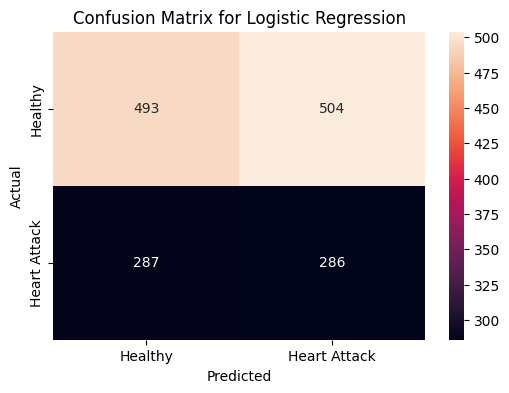

Decision Tree: Accuracy: 0.545
Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.65      0.61      0.63       997
           1       0.39      0.43      0.41       573

    accuracy                           0.55      1570
   macro avg       0.52      0.52      0.52      1570
weighted avg       0.56      0.55      0.55      1570




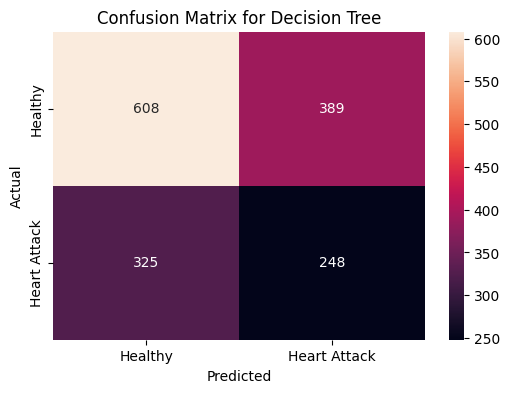

Naive Bayes: Accuracy: 0.490
Classification Report for Naive Bayes:
               precision    recall  f1-score   support

           0       0.64      0.46      0.53       997
           1       0.37      0.55      0.44       573

    accuracy                           0.49      1570
   macro avg       0.50      0.50      0.49      1570
weighted avg       0.54      0.49      0.50      1570




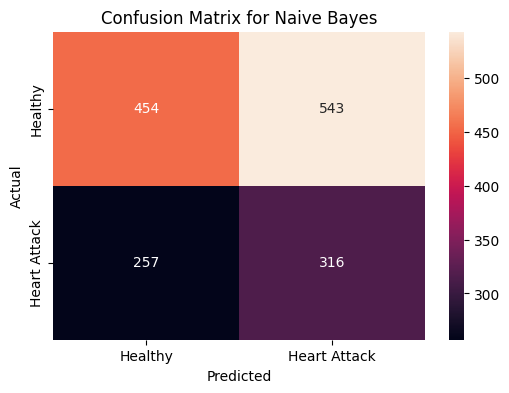

Support Vector Machine: Accuracy: 0.519
Classification Report for Support Vector Machine:
               precision    recall  f1-score   support

           0       0.64      0.56      0.60       997
           1       0.37      0.44      0.40       573

    accuracy                           0.52      1570
   macro avg       0.50      0.50      0.50      1570
weighted avg       0.54      0.52      0.53      1570




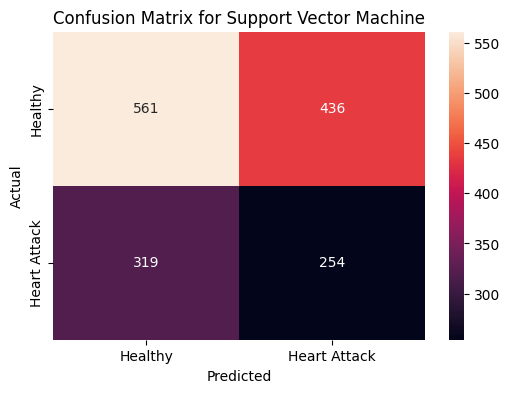

Random Forest: Accuracy: 0.567
Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.65      0.69      0.67       997
           1       0.40      0.35      0.37       573

    accuracy                           0.57      1570
   macro avg       0.52      0.52      0.52      1570
weighted avg       0.56      0.57      0.56      1570




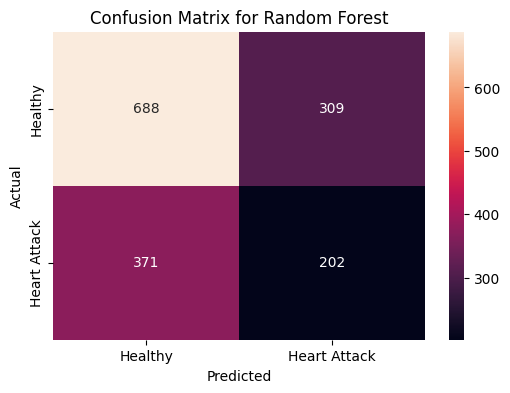

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Prepare models
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('Support Vector Machine', SVC()),
    ('Random Forest', RandomForestClassifier())
]

# Prepare lists to store results and names
results = []
names = []

# Evaluate each model in turn
for name, model in models:
    # Train the model using training data (SMOTE for handling imbalance)
    #model.fit(X_train, y_train)
    model.fit(X_train_smote, y_train_smote)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Accuracy score
    accuracy = model.score(X_test, y_test)
    results.append(accuracy)
    names.append(name)
    print(f"{name}: Accuracy: {accuracy:.3f}")

    # Classification report
    print(f"Classification Report for {name}:\n", classification_report(y_test, y_pred))
    print()

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d",
                xticklabels=['Healthy', 'Heart Attack'],
                yticklabels=['Healthy', 'Heart Attack'])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


<ipython-input-325-37d461461e3c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=names, y=results, palette='viridis')


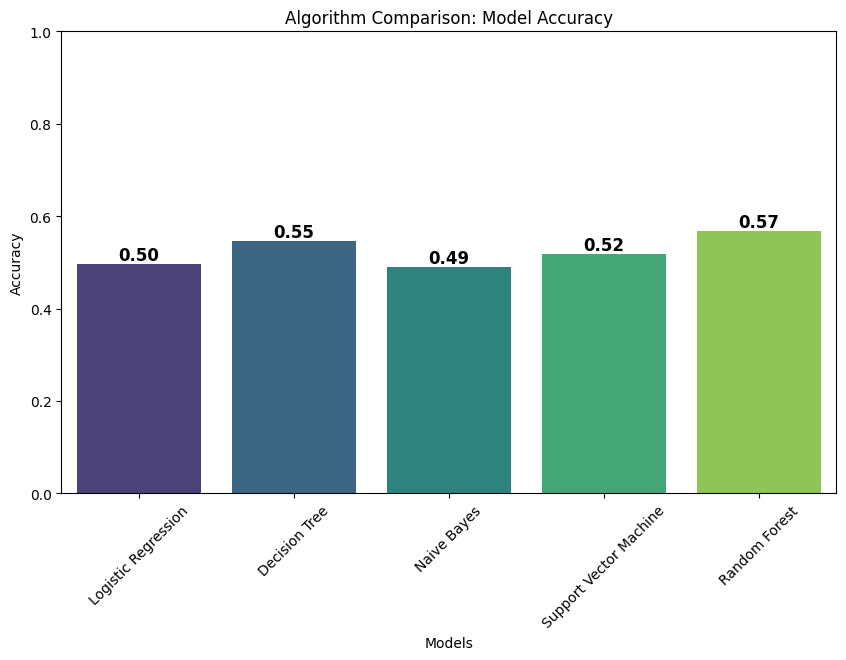

In [ ]:

# Bar plot for algorithm comparison (accuracies of models)
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=names, y=results, palette='viridis')
plt.title('Algorithm Comparison: Model Accuracy')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Limiting y-axis from 0 to 1 for accuracy percentage
plt.xticks(rotation=45)  # Rotate model names for better readability
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import graphviz
from sklearn.tree import export_graphviz

# Train Decision Tree Model
dt = DecisionTreeClassifier()
dt.fit(X_train_smote, y_train_smote)

# Predict on test set
y_pred = dt.predict(X_test)

# Evaluate Model
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1: ', f1_score(y_test, y_pred))

# 1️⃣ **Visualize Decision Tree using Matplotlib (Limited to 5 Levels)**
plt.figure(figsize=(15, 10))
plot_tree(dt, feature_names=X_train_smote.columns,
          class_names=['No', 'Yes'], filled=True, max_depth=2)  # Set max_depth=5
plt.title("Decision Tree Visualization (Up to 5 Levels)")
plt.show()

# 2️⃣ **Visualize Decision Tree using Graphviz (Limited to 5 Levels)**
dot_data = export_graphviz(dt, out_file=None,
                           feature_names=X_train_smote.columns,
                           class_names=['No', 'Yes'],
                           filled=True, rounded=True,
                           special_characters=True, max_depth=2)  # Set max_depth=5

# Convert to Graphviz format and display
graph = graphviz.Source(dot_data)
graph.view()  # Opens the tree visualization in a PDF/PNG viewer


In [ ]:
!apt-get install swig cmake
!pip install auto-sklearn


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
cmake is already the newest version (3.22.1-1ubuntu1.22.04.2).
Suggested packages:
  swig-doc swig-examples swig4.0-examples swig4.0-doc
The following NEW packages will be installed:
  swig swig4.0
0 upgraded, 2 newly installed, 0 to remove and 29 not upgraded.
Need to get 1,116 kB of archives.
After this operation, 5,542 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 swig4.0 amd64 4.0.2-1ubuntu1 [1,110 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 swig all 4.0.2-1ubuntu1 [5,632 B]
Fetched 1,116 kB in 0s (7,191 kB/s)
Selecting previously unselected package swig4.0.
(Reading database ... 124947 files and directories currently installed.)
Preparing to unpack .../swig4.0_4.0.2-1ubuntu1_amd64.deb ...
Unpacking swig4.0 (4.0.2-1ubuntu1) ...
Selecting previously unselected package swig.
Preparing to unpack .../swig_4.0.2-1ubu

In [ ]:
import autosklearn
print(autosklearn.__version__)  #

ModuleNotFoundError: No module named 'autosklearn'

In [ ]:
import autosklearn.classification
import autosklearn.regression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits


ModuleNotFoundError: No module named 'autosklearn'